- Nama : Hilmi Fawwaz Sa'ad
- NRP : 5025221103
- Kelas : Machine Learning (F)
- Supervised Learning (Kaggle Compe)


# Supervised Learning

In [389]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

warnings.filterwarnings("ignore", category=FutureWarning)

# Load Dataset

In [390]:
# Membaca dataset train.csv dan test.csv

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (4000, 18)
Test shape: (1000, 17)


# Exploratory Data Analysis

In [391]:
# Membaca isi dataset train.csv

train

,id,unique_session_id,bounces,time_on_site,pageviews,hits,session_quality_dim,latest_ecommerce_progress,avg_time_per_page,source,medium,channelGrouping,deviceCategory,operatingSystem,browser,country,city,will_buy_on_return_visit
0,0,98463921871485068561470319157,0,2818,68,86,0,6,41.992188,mall.googleplex.com,referral,referral,desktop,macintosh,chrome,canada,toronto,1
1,1,64969931561991723631486389718,0,32,4,4,0,0,8.000000,(direct),NaN,direct,desktop,linux,uc browser,india,kharagpur,1
2,2,2117346273301973411473489944,0,93,8,11,0,2,11.625000,mail.google.com,referral,referral,desktop,chrome os,chrome,united states,san francisco,1
3,3,8934726040229318731481512421,0,265,15,21,0,2,17.333333,lunametrics.com,referral,referral,mobile,android,firefox,australia,sydney,0
4,4,5054831196771327751486859045,1,0,1,1,0,0,NaN,youtube.com,referral,social,desktop,windows,internet explorer,thailand,bangkok,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4992,97935044993066181501482069964,1,0,1,1,0,0,NaN,(direct),NaN,direct,mobile,android,opera mini,burkina faso,ouagadougou,0
3996,4993,50367472411835115651495891843,1,0,1,1,0,0,NaN,google,cpc,paid search,tablet,android,chrome,india,hyderabad,0
3997,4994,2079573967163814741473478241,0,50,5,5,0,0,10.000000,mall.googleplex.com,referral,referral,desktop,linux,chrome,canada,kitchener,1
3998,4995,09127428276670369691481539217,0,28,3,4,0,2,9.333333,sites.google.com,referral,referral,desktop,linux,chrome,united states,mountain view,1


In [392]:
# Cek informasi umum dari DataFrame

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         4000 non-null   int64  
 1   unique_session_id          4000 non-null   object 
 2   bounces                    4000 non-null   int64  
 3   time_on_site               4000 non-null   int64  
 4   pageviews                  4000 non-null   int64  
 5   hits                       4000 non-null   int64  
 6   session_quality_dim        4000 non-null   int64  
 7   latest_ecommerce_progress  4000 non-null   int64  
 8   avg_time_per_page          2724 non-null   float64
 9   source                     4000 non-null   object 
 10  medium                     3404 non-null   object 
 11  channelGrouping            4000 non-null   object 
 12  deviceCategory             4000 non-null   object 
 13  operatingSystem            3984 non-null   objec

In [393]:
# Cek statistik ringkasan data numerik

train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,2486.020750,1439.917566,0.0,1258.750000,2481.5,3706.250000,4998.0
bounces,4000.0,0.318000,0.465758,0.0,0.000000,0.0,1.000000,1.0
time_on_site,4000.0,243.913250,483.536977,0.0,0.000000,41.0,247.000000,5820.0
pageviews,4000.0,7.183750,10.606866,1.0,1.000000,3.0,9.000000,194.0
hits,4000.0,8.796250,14.122184,1.0,1.000000,3.0,11.000000,262.0
session_quality_dim,4000.0,0.958750,8.391970,0.0,0.000000,0.0,0.000000,99.0
latest_ecommerce_progress,4000.0,1.390750,2.195511,0.0,0.000000,0.0,2.000000,6.0
avg_time_per_page,2724.0,34.464465,63.281845,0.5,10.139971,20.0,32.967391,969.0
will_buy_on_return_visit,4000.0,0.502250,0.500057,0.0,0.000000,1.0,1.000000,1.0


In [394]:
# Cek jumlah nilai unik di setiap kolom

train.nunique()

,0
id,4000
unique_session_id,4000
bounces,2
time_on_site,903
pageviews,74
hits,93
session_quality_dim,37
latest_ecommerce_progress,6
avg_time_per_page,1374
source,79


In [395]:
# Cek data duplikat dan nilai data yang hilang

print(f"Duplikat data : {train.duplicated().sum()}")
print(f"Missing value : {train.isnull().sum().sum()}")

Duplikat data : 0
Missing value : 2712


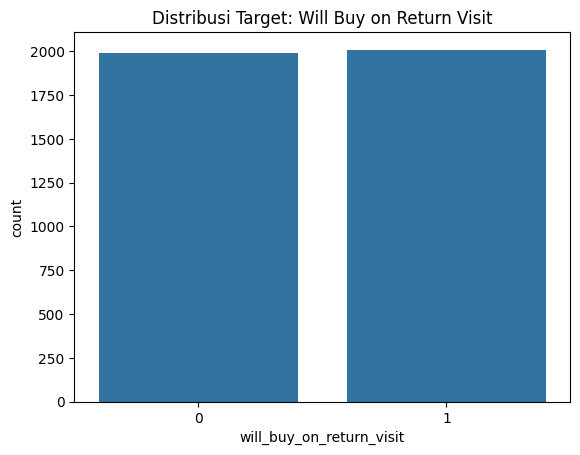

In [396]:
# Cek distribusi target will_buy_on_return_visit

sns.countplot(x='will_buy_on_return_visit', data=train)
plt.title('Distribusi Target: Will Buy on Return Visit')
plt.show()

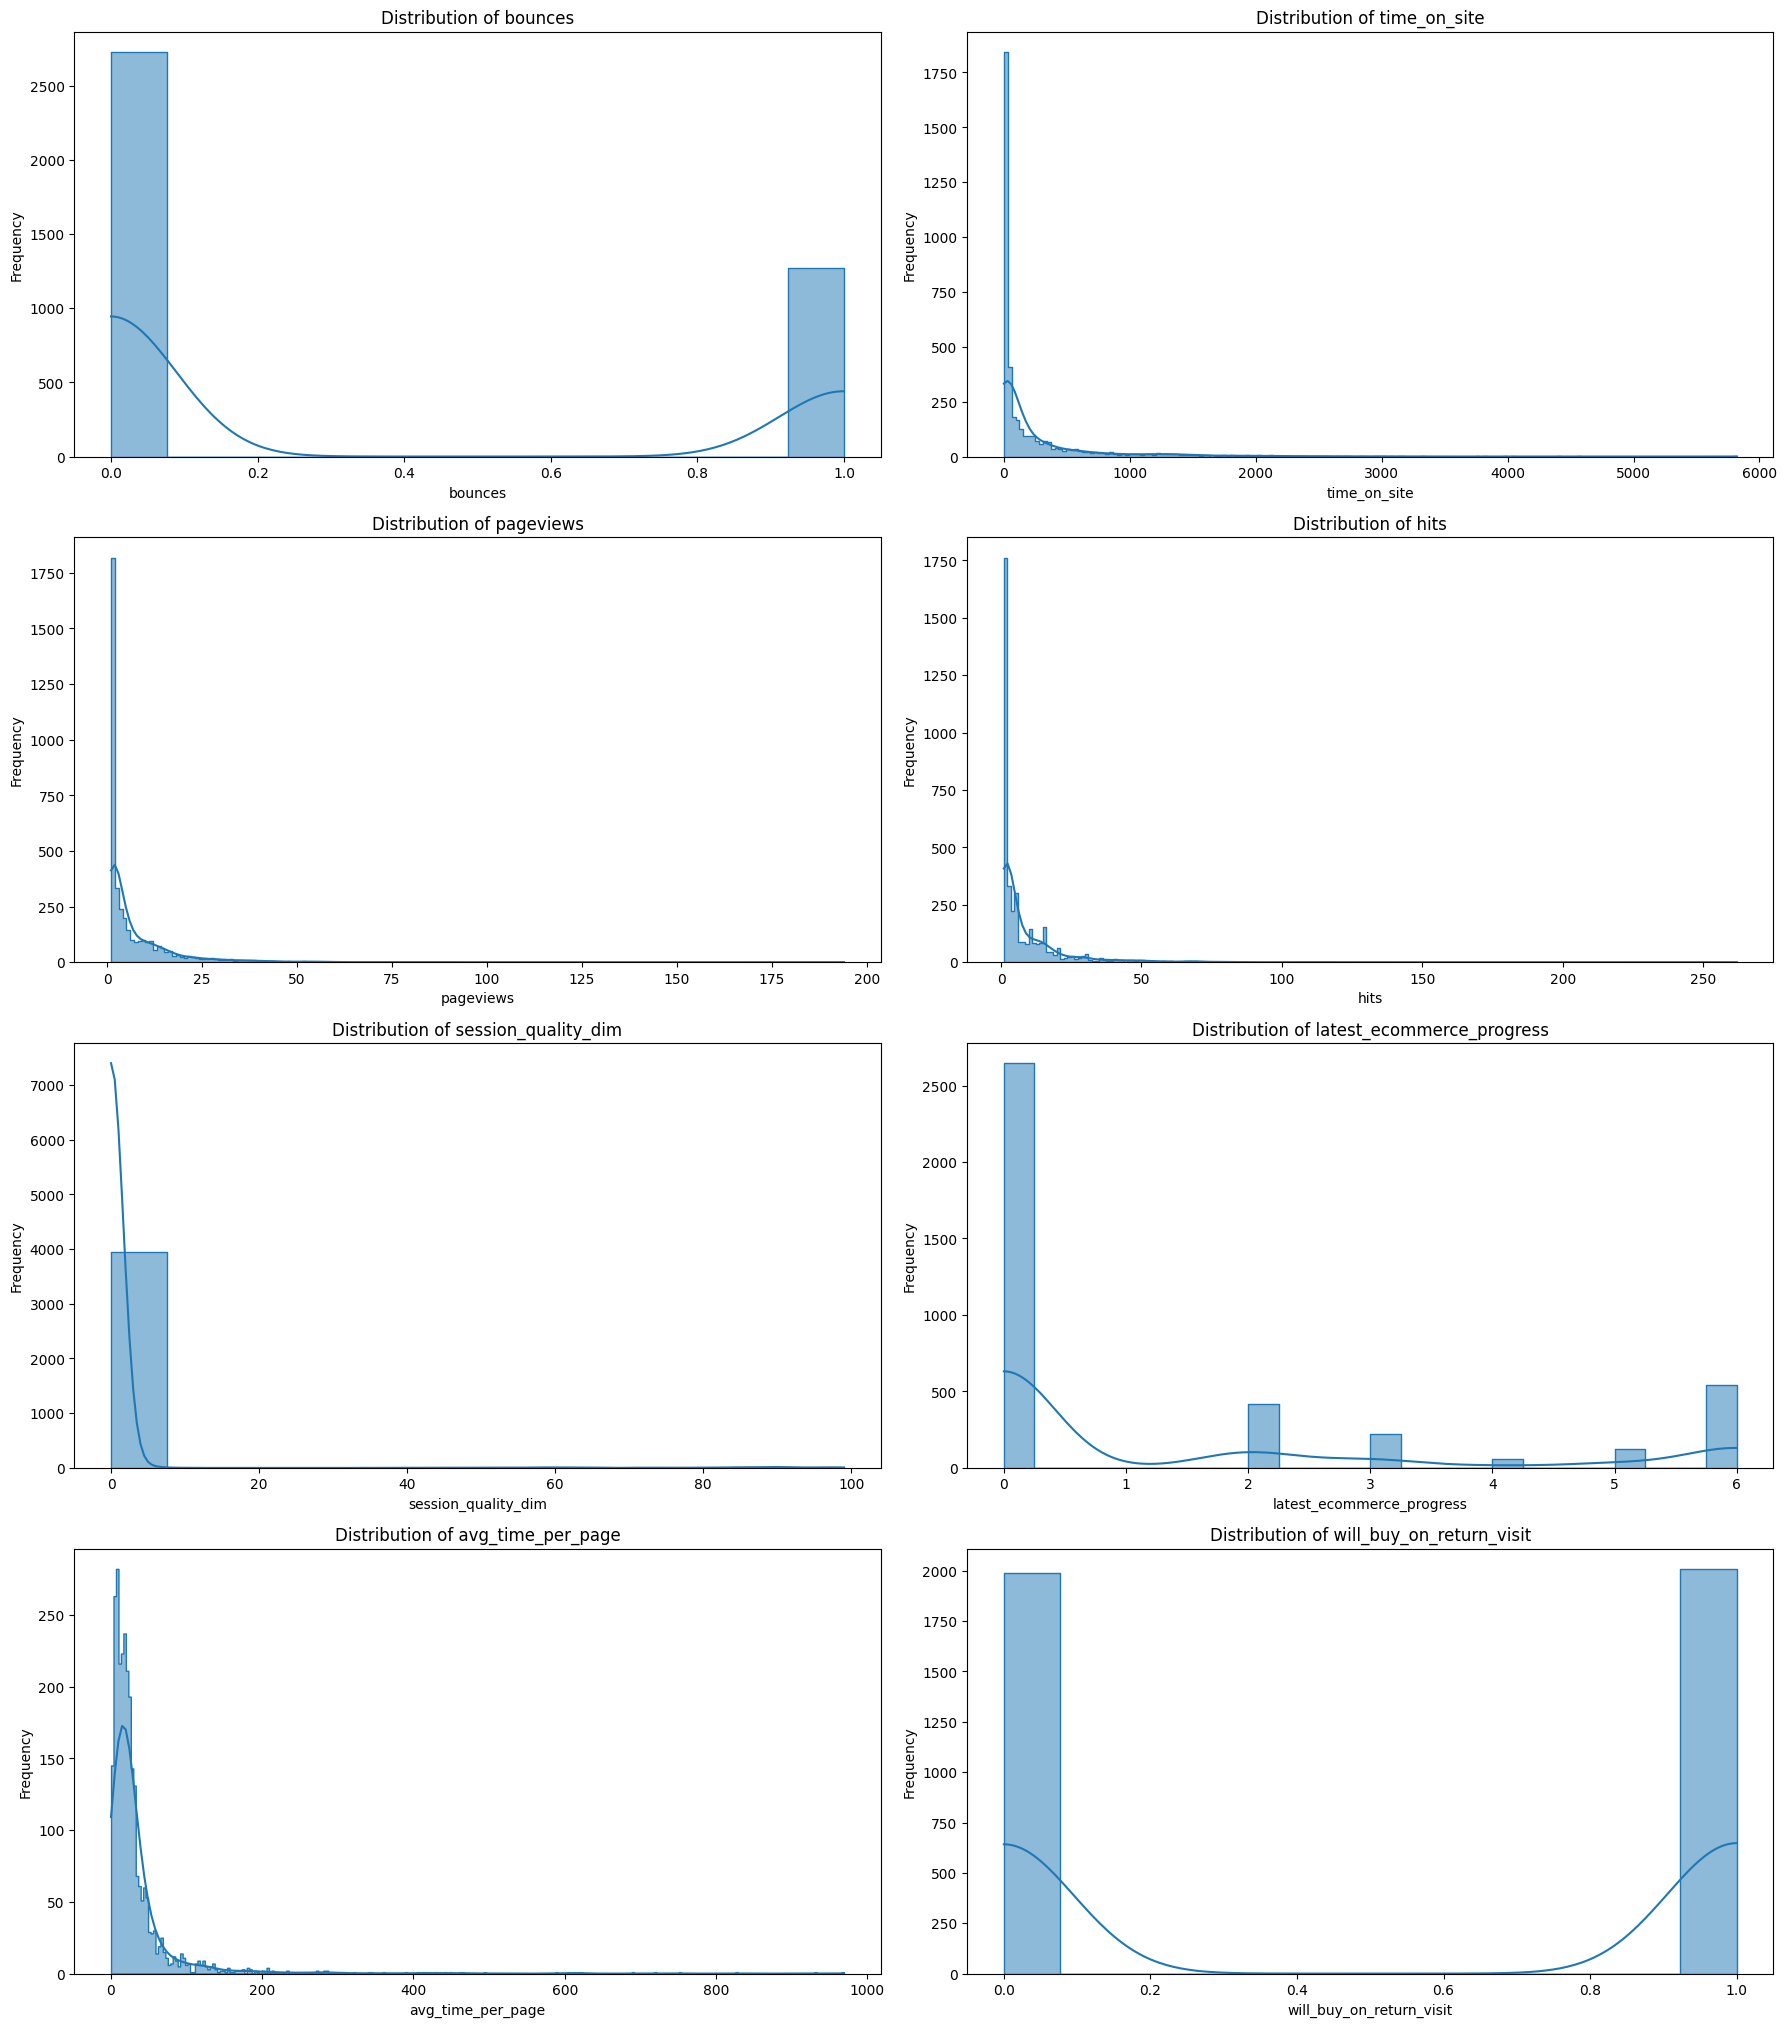

In [397]:
# Cek distribusi fitur numerik (histogram)

num_cols = ['bounces', 'time_on_site', 'pageviews', 'hits', 'session_quality_dim',  'latest_ecommerce_progress', 'avg_time_per_page', 'will_buy_on_return_visit']

n_cols = 2
n_rows = (len(num_cols) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.histplot(data=train, x=column, kde=True, element='step')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

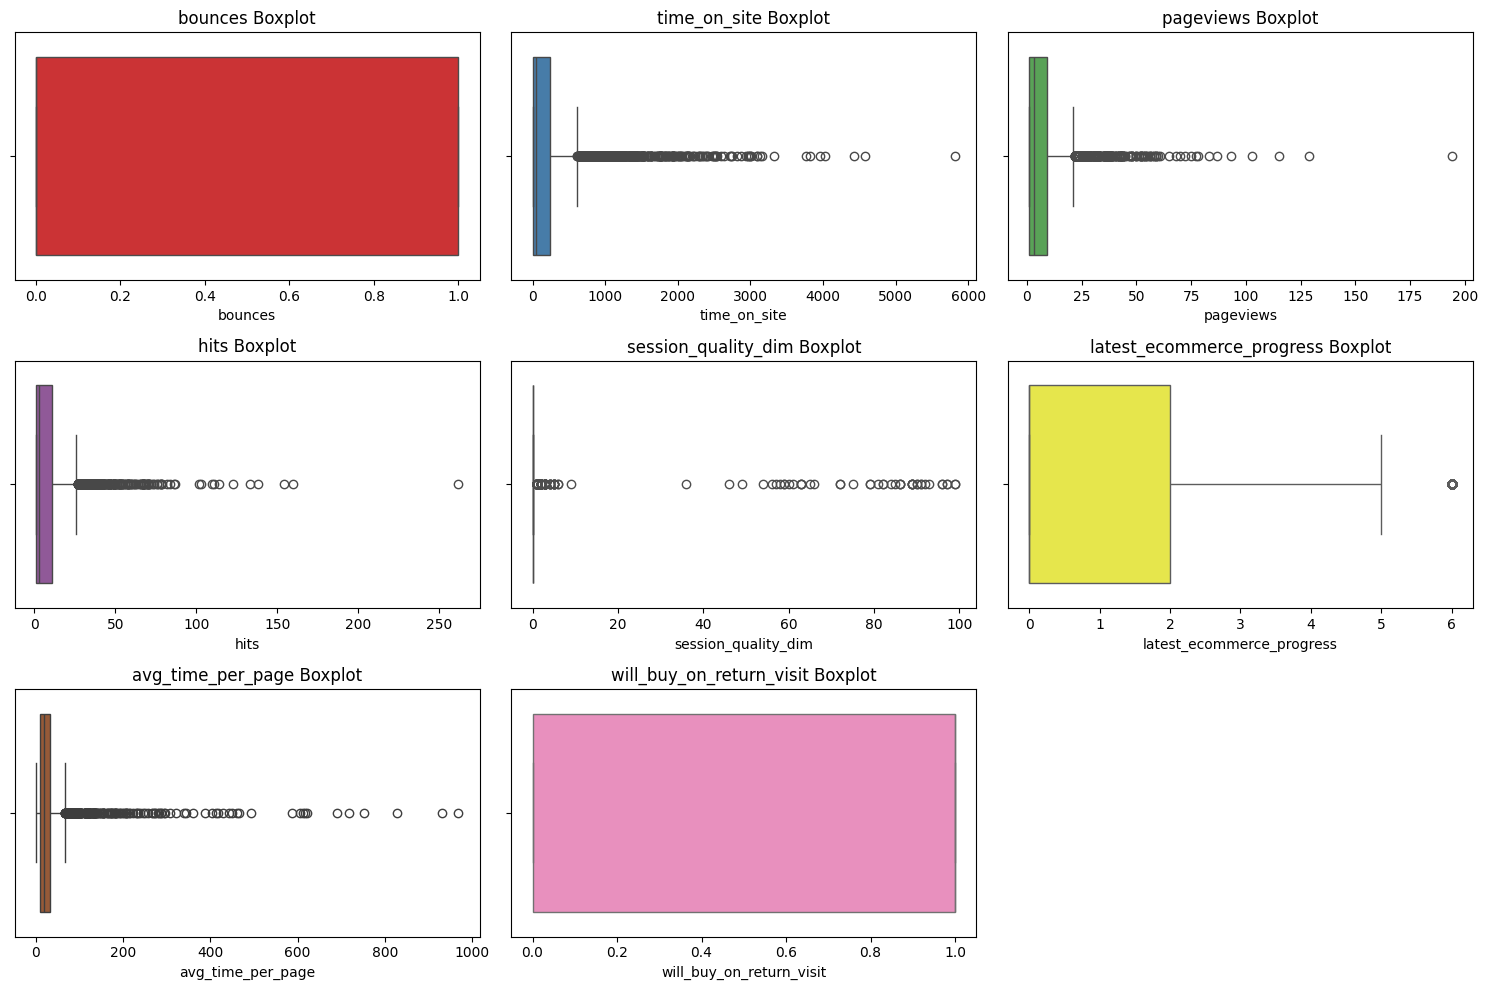

In [398]:
# Cek distribusi fitur numerikal (boxplot)

num_cols = ['bounces', 'time_on_site', 'pageviews', 'hits', 'session_quality_dim',  'latest_ecommerce_progress', 'avg_time_per_page', 'will_buy_on_return_visit']

color_palette = sns.color_palette("Set1", len(num_cols))
plt.figure(figsize = (15, 10))

for i, column in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)//3)+1, 3, i)
    sns.boxplot(data=train, x=column, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

<ipython-input-399-499822c17fcb>:10: UserWarning: 
The palette list has fewer values (8) than needed (79) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train, x=column, palette=color_palette)
<ipython-input-399-499822c17fcb>:10: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(data=train, x=column, palette=color_palette)
<ipython-input-399-499822c17fcb>:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(data=train, x=column, palette=color_palette)
<ipython-input-399-499822c17fcb>:10: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=train, x=column, palette=color_palette)
<ipython-input-399-499822c17fcb>:10: UserWarning: 
The palette list has fewer values (8) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train, x=col

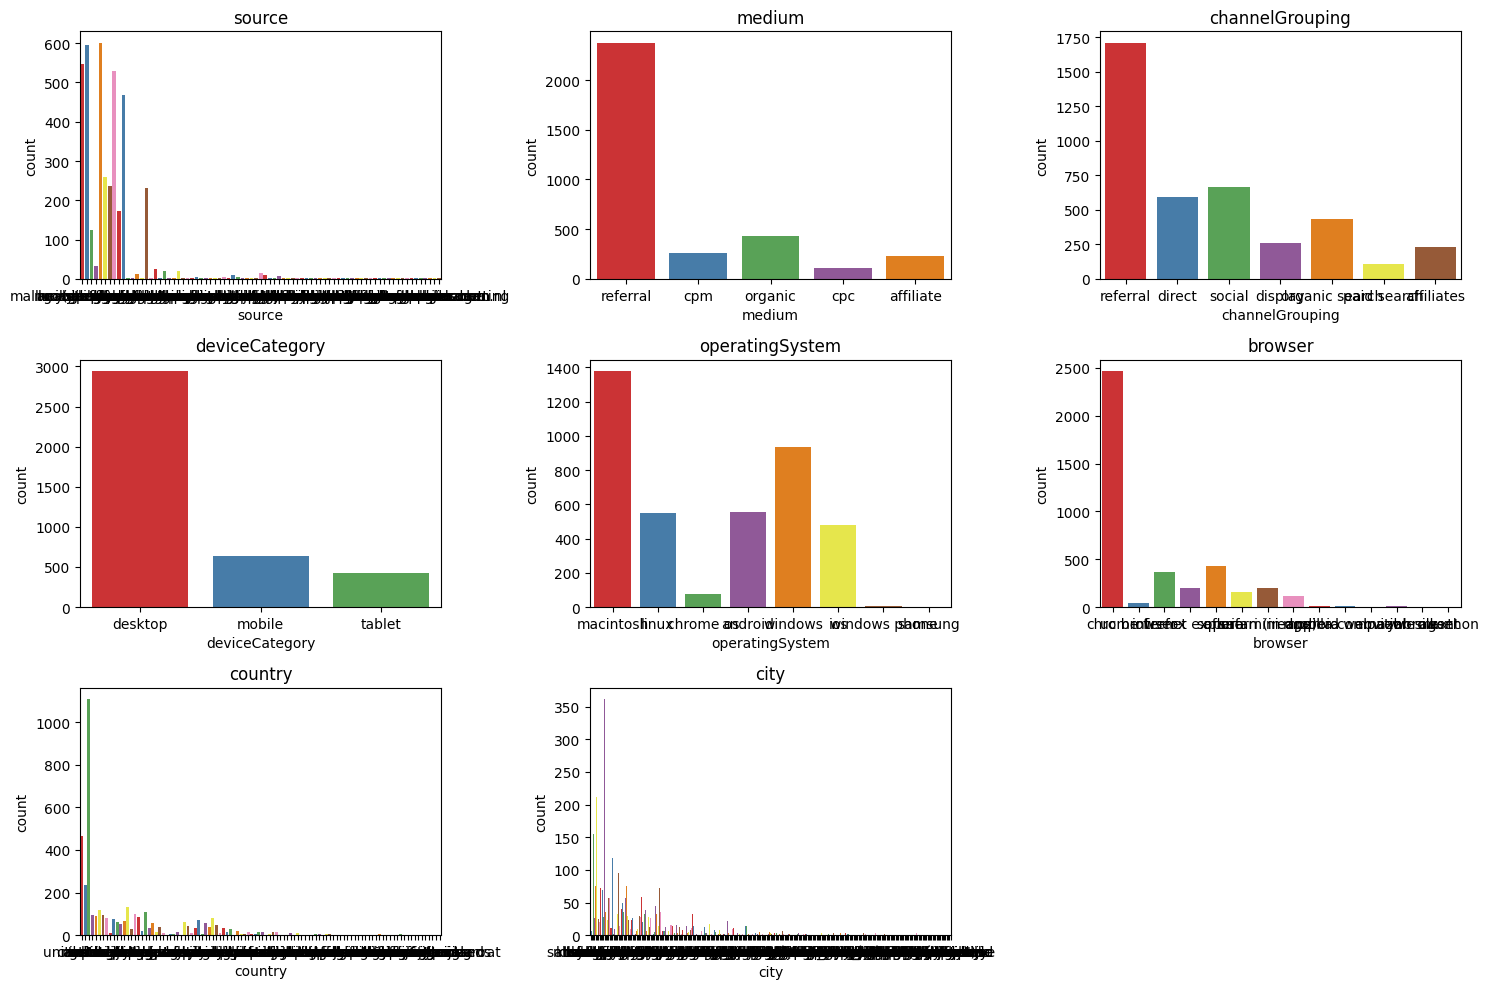

In [399]:
# Cek distribusi fitur kategorikal (boxplot visualization)

col_bar = ['source', 'medium', 'channelGrouping', 'deviceCategory', 'operatingSystem', 'browser', 'country', 'city']

color_palette = sns.color_palette("Set1", len(col_bar))

plt.figure(figsize=(15, 10))
for i, column in enumerate(col_bar, 1):
    plt.subplot((len(col_bar)//3)+1, 3, i)
    sns.countplot(data=train, x=column, palette=color_palette)
    plt.title(column)

plt.tight_layout()
plt.show()


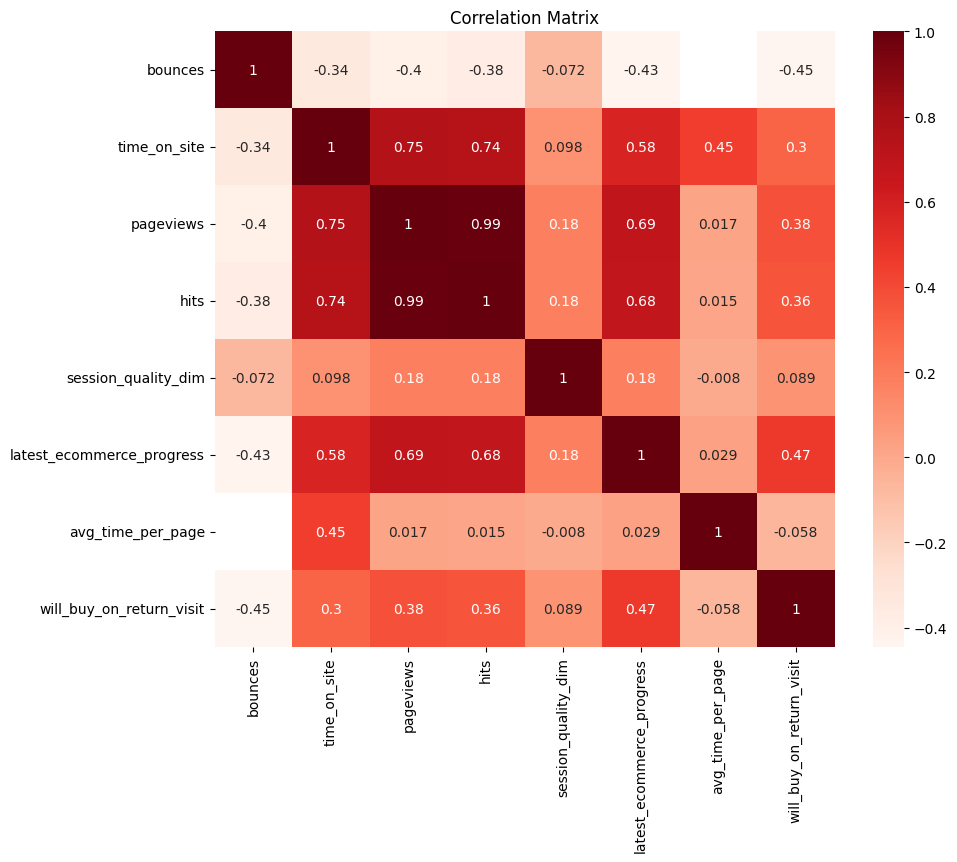

In [400]:
# Cek correlation matrix

numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
cols_for_corr = [col for col in numeric_cols if col not in ['id', 'unique_session_id']]

corr_matrix = train[cols_for_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [401]:
# Copy data training dan data test asli

train_clean = train.copy()

In [402]:
# Cek jumlah value yang hilang per kolom untuk data training

train_clean.isna().sum().sort_values(ascending=False)

,0
avg_time_per_page,1276
city,824
medium,596
operatingSystem,16
unique_session_id,0
id,0
hits,0
bounces,0
pageviews,0
time_on_site,0


## General Function

In [403]:
# Fungsi untuk mengidentifikasi jenis kolom berdasarkan set data
def identify_column_types(datasets):
    categorical_cols = []
    numerical_cols = []

    for col in datasets.columns:
        if col == 'will_buy_on_return_visit':
            continue

        if datasets[col].dtype == 'object' or pd.api.types.is_categorical_dtype(datasets[col]):
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)

    return numerical_cols, categorical_cols

In [404]:
# Memperkaya datasets
def engineer_features(datasets):
    datasets_featured = datasets.copy()

    # Menghandle missing value
    # Numerical
    numeric_cols_to_zero = ['hits', 'bounces', 'pageviews', 'time_on_site',
                           'latest_ecommerce_progress', 'session_quality_dim']
    datasets_featured[numeric_cols_to_zero] = datasets_featured[numeric_cols_to_zero].fillna(0)
    datasets_featured['avg_time_per_page_missing'] = datasets_featured['avg_time_per_page'].isna().astype(int)
    mean_time = datasets_featured['avg_time_per_page'].mean()
    datasets_featured['avg_time_per_page'] = datasets_featured['avg_time_per_page'].fillna(mean_time)

    # Kategorikal
    categorical_cols = ['city', 'medium', 'source', 'channelGrouping',
                       'deviceCategory', 'browser', 'country', 'operatingSystem']
    for col in categorical_cols:
        if col in datasets_featured.columns:
            datasets_featured[col] = datasets_featured[col].fillna('Unknown')

    # Membuat fitur baru
    if 'pageviews' in datasets_featured.columns and 'time_on_site' in datasets_featured.columns:
        datasets_featured['pageviews_per_session'] = datasets_featured['pageviews'] / (datasets_featured['time_on_site'] + 1)

    if 'time_on_site' in datasets_featured.columns and 'bounces' in datasets_featured.columns:
        datasets_featured['engagement_score'] = datasets_featured['time_on_site'] * (1 - datasets_featured['bounces'])

    if 'latest_ecommerce_progress' in datasets_featured.columns and 'bounces' in datasets_featured.columns:
        datasets_featured['conversion_potential'] = datasets_featured['latest_ecommerce_progress'] * (1 - datasets_featured['bounces'])

    if 'latest_ecommerce_progress' in datasets_featured.columns and 'time_on_site' in datasets_featured.columns:
        datasets_featured['ecommerce_engagement'] = datasets_featured['latest_ecommerce_progress'] * datasets_featured['time_on_site']

    if 'bounces' in datasets_featured.columns and 'session_quality_dim' in datasets_featured.columns:
        datasets_featured['bounce_quality'] = datasets_featured['bounces'] * datasets_featured['session_quality_dim']

    # Polinomial fitur untuk variabel penting
    if 'time_on_site' in datasets_featured.columns:
        datasets_featured['time_on_site_squared'] = datasets_featured['time_on_site'] ** 2

    if 'latest_ecommerce_progress' in datasets_featured.columns:
        datasets_featured['ecommerce_progress_squared'] = datasets_featured['latest_ecommerce_progress'] ** 2

    # Log transformasi untuk mengurangi skewness
    if 'time_on_site' in datasets_featured.columns:
        datasets_featured['log_time_on_site'] = np.log1p(datasets_featured['time_on_site'])

    if 'pageviews' in datasets_featured.columns:
        datasets_featured['log_pageviews'] = np.log1p(datasets_featured['pageviews'])

    # Fitur reduction
    if 'hits' in datasets_featured.columns:
        datasets_featured = datasets_featured.drop(['hits'], axis=1)

    return datasets_featured

In [405]:
# Pipeline preprocessing
def create_preprocessing_pipeline(X):
    numerical_cols, categorical_cols = identify_column_types(X)

    print(f"Numerical columns: {numerical_cols}")
    print(f"Categorical columns: {categorical_cols}")

    # Pipeline untuk data numerik
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Pipeline untuk data kategorikal
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Menggabungkan semuanya
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    return preprocessor, numerical_cols, categorical_cols

## Preprocessing

In [406]:
# Menghapus kolom yang tidak digunakan pada data training

train_clean.drop(columns=['id', 'unique_session_id'], inplace=True)

In [407]:
# Split fitur dan target

X_train = train_clean.drop('will_buy_on_return_visit', axis=1)
y_train = train_clean['will_buy_on_return_visit']

In [408]:
# Engineering features untuk data training

X_train_featured = engineer_features(X_train)

In [409]:
# Membuat pipeline

preprocessor, num_cols, cat_cols = create_preprocessing_pipeline(X_train_featured)

Numerical columns: ['bounces', 'time_on_site', 'pageviews', 'session_quality_dim', 'latest_ecommerce_progress', 'avg_time_per_page', 'avg_time_per_page_missing', 'pageviews_per_session', 'engagement_score', 'conversion_potential', 'ecommerce_engagement', 'bounce_quality', 'time_on_site_squared', 'ecommerce_progress_squared', 'log_time_on_site', 'log_pageviews']
Categorical columns: ['source', 'medium', 'channelGrouping', 'deviceCategory', 'operatingSystem', 'browser', 'country', 'city']


<ipython-input-403-e493d9888dda>:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if datasets[col].dtype == 'object' or pd.api.types.is_categorical_dtype(datasets[col]):


In [410]:
# Preprocessing data training

X_train_processed = preprocessor.fit_transform(X_train_featured)

In [411]:
print(f"Processed training data shape: {X_train_processed.shape}")

Processed training data shape: (4000, 520)


# Training & Eksperiment

In [412]:
# Insialisasi list metrics accuracy

models_name = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

In [413]:
# Cek Target (Klasifikasi bine)

print(y_train.dtype)
print(y_train.unique())

int64
[1 0]


## Logistic Regression

In [414]:
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression(max_iter=1000, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [415]:
# Cross-validation
cv_accuracy = cross_val_score(model_LogReg, X_train_processed, y_train, cv=skf, scoring='accuracy')
cv_precision = cross_val_score(model_LogReg, X_train_processed, y_train, cv=skf, scoring='precision')
cv_recall = cross_val_score(model_LogReg, X_train_processed, y_train, cv=skf, scoring='recall')
cv_f1 = cross_val_score(model_LogReg, X_train_processed, y_train, cv=skf, scoring='f1')
cv_roc_auc = cross_val_score(model_LogReg, X_train_processed, y_train, cv=skf, scoring='roc_auc')

In [416]:
model_LogReg.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [417]:
models_name.append("Logistic Regression")
accuracies.append(cv_accuracy.mean())
precisions.append(cv_precision.mean())
recalls.append(cv_recall.mean())
f1_scores.append(cv_f1.mean())
roc_aucs.append(cv_roc_auc.mean())

print(f"Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
print(f"Precision: {cv_precision.mean():.4f} (±{cv_precision.std():.4f})")
print(f"Recall: {cv_recall.mean():.4f} (±{cv_recall.std():.4f})")
print(f"F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
print(f"ROC AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")

Accuracy: 0.9092 (±0.0054)
Precision: 0.9025 (±0.0103)
Recall: 0.9189 (±0.0160)
F1 Score: 0.9104 (±0.0059)
ROC AUC: 0.9612 (±0.0082)


## Support Vector Machine

In [418]:
from sklearn.svm import SVC

model_SVC = SVC(probability=True, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [419]:
# Cross Validation
cv_accuracy = cross_val_score(model_SVC, X_train_processed, y_train, cv=skf, scoring='accuracy')
cv_precision = cross_val_score(model_SVC, X_train_processed, y_train, cv=skf, scoring='precision')
cv_recall = cross_val_score(model_SVC, X_train_processed, y_train, cv=skf, scoring='recall')
cv_f1 = cross_val_score(model_SVC, X_train_processed, y_train, cv=skf, scoring='f1')
cv_roc_auc = cross_val_score(model_SVC, X_train_processed, y_train, cv=skf, scoring='roc_auc')

In [420]:
model_SVC.fit(X_train_processed, y_train)

SVC(probability=True, random_state=42)

In [421]:
models_name.append("Support Vector Machine")
accuracies.append(cv_accuracy.mean())
precisions.append(cv_precision.mean())
recalls.append(cv_recall.mean())
f1_scores.append(cv_f1.mean())
roc_aucs.append(cv_roc_auc.mean())

print(f"Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
print(f"Precision: {cv_precision.mean():.4f} (±{cv_precision.std():.4f})")
print(f"Recall: {cv_recall.mean():.4f} (±{cv_recall.std():.4f})")
print(f"F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
print(f"ROC AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")

Accuracy: 0.8985 (±0.0089)
Precision: 0.8818 (±0.0202)
Recall: 0.9224 (±0.0100)
F1 Score: 0.9014 (±0.0072)
ROC AUC: 0.9566 (±0.0094)


## XGBoost

In [422]:
import xgboost as xgb

model_XGB = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [423]:
# Cross Validation
cv_accuracy = cross_val_score(model_XGB, X_train_processed, y_train, cv=skf, scoring='accuracy')
cv_precision = cross_val_score(model_XGB, X_train_processed, y_train, cv=skf, scoring='precision')
cv_recall = cross_val_score(model_XGB, X_train_processed, y_train, cv=skf, scoring='recall')
cv_f1 = cross_val_score(model_XGB, X_train_processed, y_train, cv=skf, scoring='f1')
cv_roc_auc = cross_val_score(model_XGB, X_train_processed, y_train, cv=skf, scoring='roc_auc')

In [424]:
model_XGB.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [425]:
models_name.append("XGBoost")
accuracies.append(cv_accuracy.mean())
precisions.append(cv_precision.mean())
recalls.append(cv_recall.mean())
f1_scores.append(cv_f1.mean())
roc_aucs.append(cv_roc_auc.mean())

print(f"Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
print(f"Precision: {cv_precision.mean():.4f} (±{cv_precision.std():.4f})")
print(f"Recall: {cv_recall.mean():.4f} (±{cv_recall.std():.4f})")
print(f"F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
print(f"ROC AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")

Accuracy: 0.9012 (±0.0061)
Precision: 0.8908 (±0.0114)
Recall: 0.9159 (±0.0091)
F1 Score: 0.9031 (±0.0058)
ROC AUC: 0.9579 (±0.0062)


## Gradient Boosting Classifier

In [426]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [427]:
# Cross Validation
cv_accuracy = cross_val_score(model_GBC, X_train_processed, y_train, cv=skf, scoring='accuracy')
cv_precision = cross_val_score(model_GBC, X_train_processed, y_train, cv=skf, scoring='precision')
cv_recall = cross_val_score(model_GBC, X_train_processed, y_train, cv=skf, scoring='recall')
cv_f1 = cross_val_score(model_GBC, X_train_processed, y_train, cv=skf, scoring='f1')
cv_roc_auc = cross_val_score(model_GBC, X_train_processed, y_train, cv=skf, scoring='roc_auc')

In [428]:
model_GBC.fit(X_train_processed, y_train)

GradientBoostingClassifier(random_state=42)

In [429]:
models_name.append("Gradient Boosting Classifier")
accuracies.append(cv_accuracy.mean())
precisions.append(cv_precision.mean())
recalls.append(cv_recall.mean())
f1_scores.append(cv_f1.mean())
roc_aucs.append(cv_roc_auc.mean())

print(f"Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
print(f"Precision: {cv_precision.mean():.4f} (±{cv_precision.std():.4f})")
print(f"Recall: {cv_recall.mean():.4f} (±{cv_recall.std():.4f})")
print(f"F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
print(f"ROC AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")

Accuracy: 0.9042 (±0.0065)
Precision: 0.8928 (±0.0147)
Recall: 0.9204 (±0.0147)
F1 Score: 0.9062 (±0.0061)
ROC AUC: 0.9608 (±0.0092)


## Naive Bayes

In [430]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [431]:
# Cross Validation
cv_accuracy = cross_val_score(model_NB, X_train_processed, y_train, cv=skf, scoring='accuracy')
cv_precision = cross_val_score(model_NB, X_train_processed, y_train, cv=skf, scoring='precision')
cv_recall = cross_val_score(model_NB, X_train_processed, y_train, cv=skf, scoring='recall')
cv_f1 = cross_val_score(model_NB, X_train_processed, y_train, cv=skf, scoring='f1')
cv_roc_auc = cross_val_score(model_NB, X_train_processed, y_train, cv=skf, scoring='roc_auc')

In [432]:
model_NB.fit(X_train_processed, y_train)

GaussianNB()

In [433]:
models_name.append("Naive Bayes")
accuracies.append(cv_accuracy.mean())
precisions.append(cv_precision.mean())
recalls.append(cv_recall.mean())
f1_scores.append(cv_f1.mean())
roc_aucs.append(cv_roc_auc.mean())

print(f"Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
print(f"Precision: {cv_precision.mean():.4f} (±{cv_precision.std():.4f})")
print(f"Recall: {cv_recall.mean():.4f} (±{cv_recall.std():.4f})")
print(f"F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
print(f"ROC AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")

Accuracy: 0.6763 (±0.0062)
Precision: 0.6115 (±0.0057)
Recall: 0.9751 (±0.0090)
F1 Score: 0.7516 (±0.0029)
ROC AUC: 0.6790 (±0.0058)


## Random Forest Classifier

In [434]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [435]:
# Cross Validation
cv_accuracy = cross_val_score(model_RFC, X_train_processed, y_train, cv=skf, scoring='accuracy')
cv_precision = cross_val_score(model_RFC, X_train_processed, y_train, cv=skf, scoring='precision')
cv_recall = cross_val_score(model_RFC, X_train_processed, y_train, cv=skf, scoring='recall')
cv_f1 = cross_val_score(model_RFC, X_train_processed, y_train, cv=skf, scoring='f1')
cv_roc_auc = cross_val_score(model_RFC, X_train_processed, y_train, cv=skf, scoring='roc_auc')

In [436]:
model_RFC.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [437]:
models_name.append("Random Forest Classifier")
accuracies.append(cv_accuracy.mean())
precisions.append(cv_precision.mean())
recalls.append(cv_recall.mean())
f1_scores.append(cv_f1.mean())
roc_aucs.append(cv_roc_auc.mean())

print(f"Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
print(f"Precision: {cv_precision.mean():.4f} (±{cv_precision.std():.4f})")
print(f"Recall: {cv_recall.mean():.4f} (±{cv_recall.std():.4f})")
print(f"F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
print(f"ROC AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")

Accuracy: 0.8873 (±0.0077)
Precision: 0.8715 (±0.0096)
Recall: 0.9099 (±0.0176)
F1 Score: 0.8901 (±0.0082)
ROC AUC: 0.9545 (±0.0076)


## Hasil Eksperiment

In [438]:
result_df_acc = pd.DataFrame({
    'Model': models_name,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

result_df_acc

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.90925,0.902480,0.918876,0.910444
1,Support Vector Machine,0.89850,0.881764,0.922357,0.901364
2,XGBoost,0.90125,0.890795,0.915881,0.903081
3,Gradient Boosting Classifier,0.90425,0.892769,0.920367,0.906156
4,Naive Bayes,0.67625,0.611513,0.975119,0.751599
5,Random Forest Classifier,0.88725,0.871471,0.909917,0.890135


# Hyperparameter Tunning

In [439]:
def train_xgboost(X_train_processed, y_train):
    # XGBoost parameters
    params = {
        'learning_rate': 0.1,
        'max_depth': 6,
        'min_child_weight': 1,
        'gamma': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'objective': 'binary:logistic',
        'n_estimators': 200,
        'random_state': 42
    }

    # Create and train model
    model = xgb.XGBClassifier(**params)
    model.fit(X_train_processed, y_train)

    return model


# Kaggle Competition

In [440]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1000 non-null   int64  
 1   unique_session_id          1000 non-null   object 
 2   bounces                    1000 non-null   int64  
 3   time_on_site               1000 non-null   int64  
 4   pageviews                  1000 non-null   int64  
 5   hits                       1000 non-null   int64  
 6   session_quality_dim        1000 non-null   int64  
 7   latest_ecommerce_progress  1000 non-null   int64  
 8   avg_time_per_page          651 non-null    float64
 9   source                     1000 non-null   object 
 10  medium                     841 non-null    object 
 11  channelGrouping            1000 non-null   object 
 12  deviceCategory             1000 non-null   object 
 13  operatingSystem            996 non-null    object

In [441]:
# Copy data test

test_clean = test.copy()

In [442]:
test_clean.isna().sum().sort_values(ascending=False)

,0
avg_time_per_page,349
city,182
medium,159
operatingSystem,4
id,0
pageviews,0
unique_session_id,0
time_on_site,0
bounces,0
latest_ecommerce_progress,0


In [443]:
# Menghapus kolom yang tidak digunakan pada data training

test_clean.drop(columns=['id', 'unique_session_id'], inplace=True)

In [444]:
# Engineering features untuk data test

test_featured = engineer_features(test_clean)

In [445]:
# Preprocessing data test

test_processed = preprocessor.transform(test_featured)

In [446]:
print(f"Processed test data shape: {test_processed.shape}")

Processed test data shape: (1000, 520)


In [447]:
# Train model hasil hyperparameter tunning

model = train_xgboost(X_train_processed, y_train)

In [448]:
# Membuat prediksi

test_prediction = model.predict(test_processed)

In [449]:
submission = pd.DataFrame({
    'id': test['id'],
    'will_buy_on_return_visit': test_prediction
})

In [450]:
submission.to_csv('submission.csv', index=False)